# Pandas - Data Analysis with Python


Pandas is a high-performance, easy-to-use data structures and data analysis tools.

<img src="images/pandas.jpg" style="width: 500px;"/>



## What is it good for?

Working with (large) data sets and created automated data processes.

For instance: 
* **Merge** multiple data sets into one common dataset.
* **Clean** up data (e.g. fill out missing information and fix inconsistent formatting).
* **Import and export** data into standard formats (CSV, Excel, Latex, ..).
* Combine with Numpy for **advanced computations** or Matplotlib for **visualisations**.


## More information

* Official Pandas documentation: http://pandas.pydata.org/pandas-docs/stable/tutorials.html 
* Pandas cookbook: http://pandas.pydata.org/pandas-docs/stable/cookbook.html
* Wes McKinney, Python for Data Analysis 
![Python for Data Analysis](images/python_for_data_analysis.gif "Python for Data Analysis")

## Installation

* If you have Anaconda: Already installed
* If you have Miniconda: `conda install pandas`
* If you have your another Python distribution: `pip install pandas --user`


## Quick guide through Pandas


In [14]:
%matplotlib inline

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('matplotlib.pyplot.style.use', 'default')  # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

OptionError: "No such keys(s): 'matplotlib.pyplot.style.use'"

## Some interesting data sources

### (Norsk) Statistisk sentralbyrå
https://www.ssb.no

Employment rates, immigration rates housing market, ...

<img src="images/ssb.png" style="width: 400px;"/>

### Finn API 
https://www.finn.no/api

Note: Unfortunately currently not open

### Ruter API 
https://ruter.no/labs/

Travel planning and live departure information. For example live departure information 


<img src="images/raspberry_pi_project.jpg" style="width: 300px;"/>

(Credits: Malte Pliszewski)

### YR data
http://om.yr.no/verdata/free-weather-data/



### Oslo Bysykkel API
https://developer.oslobysykkel.no

Live usage data and statistics. This lecture will use this data.

### Financial and economic data
https://www.quandl.com/

### And lots lots more:

* Almost every "smart" device, internet of things, ...

## Loading in data

Pandas offers various drivers to load data in different formats:

In [34]:
pd.read_*?

In [35]:
pd.read_csv?

### Reading in the Oslo Byskkel data 

The monthly usage data can be downloaded here: https://developer.oslobysykkel.no/data. 

We will use the data from August to September 2016:

In [36]:
!ls -hl data/bysykkel/*.csv

-rw-rw-r-- 1 sf1409 sf1409 14M jan.  31  2017 data/bysykkel/trips-2016.10.1-2016.10.31.csv
-rw-rw-r-- 1 sf1409 sf1409 21M jan.  31  2017 data/bysykkel/trips-2016.8.1-2016.8.31.csv
-rw-rw-r-- 1 sf1409 sf1409 22M jan.  31  2017 data/bysykkel/trips-2016.9.1-2016.9.30.csv


Let's inspect the content of one of these files:

In [37]:
!head data/bysykkel/trips-2016.10.1-2016.10.31.csv

Start station,Start time,End station,End time
283,2016-10-01 06:00:08 +0200,238,2016-10-01 06:09:47 +0200
169,2016-10-01 06:00:41 +0200,175,2016-10-01 06:11:07 +0200
211,2016-10-01 06:01:02 +0200,162,2016-10-01 06:15:52 +0200
200,2016-10-01 06:01:20 +0200,163,2016-10-01 06:15:04 +0200
157,2016-10-01 06:02:16 +0200,163,2016-10-01 06:04:29 +0200
177,2016-10-01 06:04:22 +0200,179,2016-10-01 06:24:40 +0200
257,2016-10-01 06:04:39 +0200,199,2016-10-01 06:16:09 +0200
191,2016-10-01 06:05:54 +0200,191,2016-10-01 06:06:21 +0200
191,2016-10-01 06:06:01 +0200,167,2016-10-01 06:15:40 +0200


Since this is a comma seperated file, we can use Panda's `read_csv` function:

In [38]:
bike_stats = pd.read_csv('data/bysykkel/trips-2016.10.1-2016.10.31.csv', sep=',')

The result is stored in  a `DataFrame` object.

In [39]:
type(bike_stats)

pandas.core.frame.DataFrame

`DataFrame`s are two-dimensional tabular data structure with labeled axes (rows and columns).

In [40]:
bike_stats

,Start station,Start time,End station,End time
0,283,2016-10-01 06:00:08 +0200,238.0,2016-10-01 06:09:47 +0200
1,169,2016-10-01 06:00:41 +0200,175.0,2016-10-01 06:11:07 +0200
2,211,2016-10-01 06:01:02 +0200,162.0,2016-10-01 06:15:52 +0200
3,200,2016-10-01 06:01:20 +0200,163.0,2016-10-01 06:15:04 +0200
4,157,2016-10-01 06:02:16 +0200,163.0,2016-10-01 06:04:29 +0200
5,177,2016-10-01 06:04:22 +0200,179.0,2016-10-01 06:24:40 +0200
6,257,2016-10-01 06:04:39 +0200,199.0,2016-10-01 06:16:09 +0200
7,191,2016-10-01 06:05:54 +0200,191.0,2016-10-01 06:06:21 +0200
8,191,2016-10-01 06:06:01 +0200,167.0,2016-10-01 06:15:40 +0200
9,181,2016-10-01 06:06:13 +0200,251.0,2016-10-01 06:18:34 +0200


We can use the `head` function to only show the (by defauly 5) top rows in the data table.

In [41]:
bike_stats.head()

,Start station,Start time,End station,End time
0,283,2016-10-01 06:00:08 +0200,238.0,2016-10-01 06:09:47 +0200
1,169,2016-10-01 06:00:41 +0200,175.0,2016-10-01 06:11:07 +0200
2,211,2016-10-01 06:01:02 +0200,162.0,2016-10-01 06:15:52 +0200
3,200,2016-10-01 06:01:20 +0200,163.0,2016-10-01 06:15:04 +0200
4,157,2016-10-01 06:02:16 +0200,163.0,2016-10-01 06:04:29 +0200


### Selecting columns

We can select a column with the index notation. As index we use the column title:

In [42]:
bike_stats['Start time'].head()

0    2016-10-01 06:00:08 +0200
1    2016-10-01 06:00:41 +0200
2    2016-10-01 06:01:02 +0200
3    2016-10-01 06:01:20 +0200
4    2016-10-01 06:02:16 +0200
Name: Start time, dtype: object

Multiple columns are selected by indexing with a list of column titles:

In [43]:
bike_stats[['Start time', 'End time']].head()

,Start time,End time
0,2016-10-01 06:00:08 +0200,2016-10-01 06:09:47 +0200
1,2016-10-01 06:00:41 +0200,2016-10-01 06:11:07 +0200
2,2016-10-01 06:01:02 +0200,2016-10-01 06:15:52 +0200
3,2016-10-01 06:01:20 +0200,2016-10-01 06:15:04 +0200
4,2016-10-01 06:02:16 +0200,2016-10-01 06:04:29 +0200


### Change type of columns
Pandas tries to automatically detect the type of a column (just like numpy):

In [44]:
bike_stats.dtypes

Start station      int64
Start time        object
End station      float64
End time          object
dtype: object

We can see that this automatic detection failed for both `Start time` and `End time`: their `dtype` is set to `object` instead of a `date` data type. In order to be able to sort or filter by date, we need to tell Pandas that this column should be parsed as dates. We can do this directly when loading in the data: 

In [45]:
bike_stats_types = pd.read_csv('data/bysykkel/trips-2016.10.1-2016.10.31.csv', sep=',', parse_dates=['Start time', 'End time'])

In [46]:
bike_stats_types.head()

,Start station,Start time,End station,End time
0,283,2016-10-01 04:00:08,238.0,2016-10-01 04:09:47
1,169,2016-10-01 04:00:41,175.0,2016-10-01 04:11:07
2,211,2016-10-01 04:01:02,162.0,2016-10-01 04:15:52
3,200,2016-10-01 04:01:20,163.0,2016-10-01 04:15:04
4,157,2016-10-01 04:02:16,163.0,2016-10-01 04:04:29


We can check the types explicitely with `dtype`:

In [47]:
import numpy as np
bike_stats_types["Start time"].dtype == np.dtype('datetime64[ns]')

True

Also note that `End station` has been detected as `float` rather than `int`. This is because the `End station` column contains Not a Number values (`NaN`) which can be represented in the `float` datatype, but not in the `int` datatype

### Plotting

We can use the `plot` class method to plot our table:

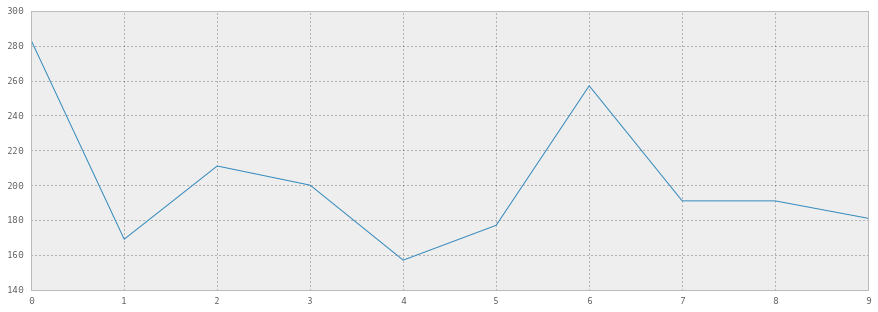

In [49]:
bike_stats_types['Start station'].head(10).plot()

By default, Pandas enumerates the x-axis.

Passing multiple columns results in multiple plot lines

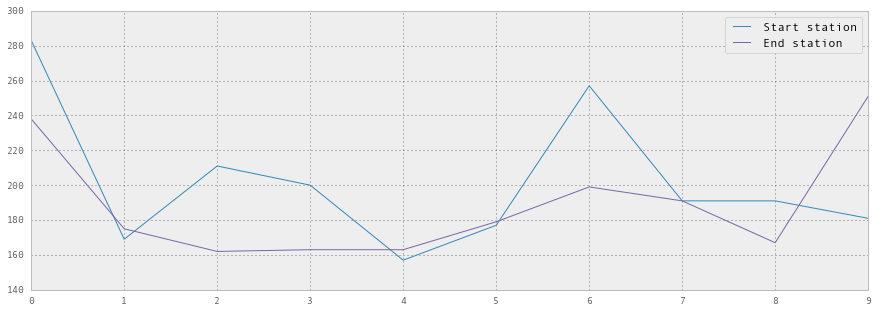

In [59]:
data = bike_stats_types[['Start station', 'End station']].head(10)
data.plot()

In order to get a more meaningful x-axis, we can select a column to be used as the x-axis:

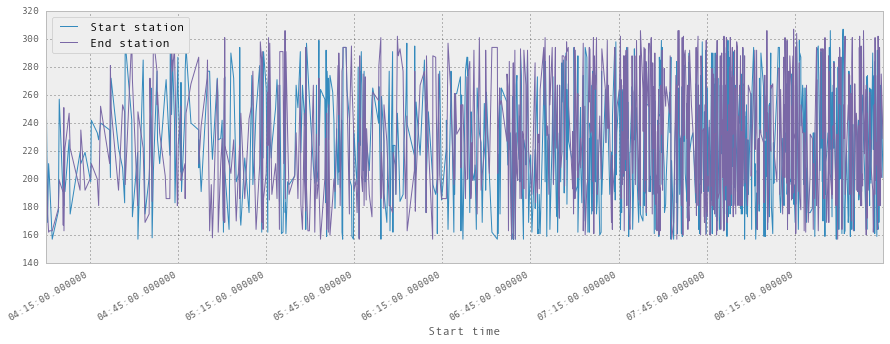

In [63]:
bike_stats_types.head(1000).plot(x='Start time', y=['Start station', 'End station'])

The documentation of plot reveils many more plotting options:

In [53]:
bike_stats_types.plot?

For example, let's create a bar plot:

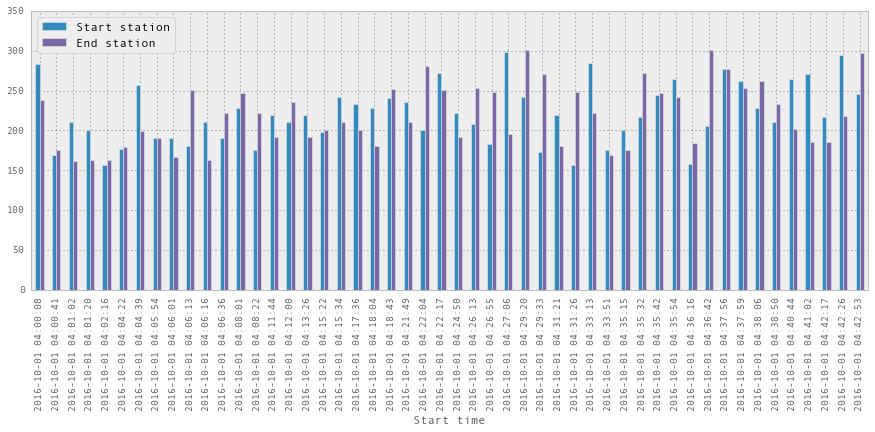

In [66]:
bike_stats_types.head(50).plot(x='Start time', y=['Start station', 'End station'], kind='bar')

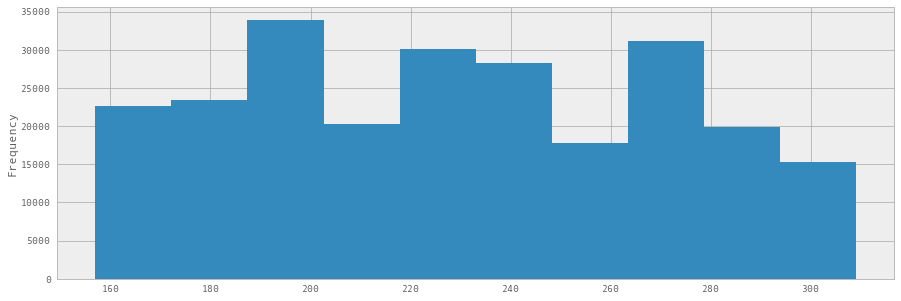

In [99]:
bike_stats_types['Start station'].plot(kind='hist')

### Saving data 

Panda tables can be written out to various formats. For exporting to a spreadsheet compatible format (e.g. Excel), you can export as CSV file: 

In [75]:
data = bike_stats_types[['Start station', 'End station']].head(10)

data.to_csv()

',Start station,End station\n0,283,238.0\n1,169,175.0\n2,211,162.0\n3,200,163.0\n4,157,163.0\n5,177,179.0\n6,257,199.0\n7,191,191.0\n8,191,167.0\n9,181,251.0\n'

Pandas can also be useful to automatically generate Latex tables: 

In [79]:
data.to_latex()

'\\begin{tabular}{lrr}\n\\toprule\n{} &  Start station &  End station \\\\\n\\midrule\n0 &            283 &        238.0 \\\\\n1 &            169 &        175.0 \\\\\n2 &            211 &        162.0 \\\\\n3 &            200 &        163.0 \\\\\n4 &            157 &        163.0 \\\\\n5 &            177 &        179.0 \\\\\n6 &            257 &        199.0 \\\\\n7 &            191 &        191.0 \\\\\n8 &            191 &        167.0 \\\\\n9 &            181 &        251.0 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [81]:
with open('table.tex', 'w') as file:
    file.write(data.to_latex())

# Selecting data from dataframes

We select by indexing with the column name:

In [29]:
bike_stats['Start time'].head()

0    2016-10-01 06:00:08 +0200
1    2016-10-01 06:00:41 +0200
2    2016-10-01 06:01:02 +0200
3    2016-10-01 06:01:20 +0200
4    2016-10-01 06:02:16 +0200
Name: Start time, dtype: object

A range of rows can be selected by indexing a slice:

In [30]:
bike_stats[5:15]

,Start station,Start time,End station,End time
5,177,2016-10-01 06:04:22 +0200,179.0,2016-10-01 06:24:40 +0200
6,257,2016-10-01 06:04:39 +0200,199.0,2016-10-01 06:16:09 +0200
7,191,2016-10-01 06:05:54 +0200,191.0,2016-10-01 06:06:21 +0200
8,191,2016-10-01 06:06:01 +0200,167.0,2016-10-01 06:15:40 +0200
9,181,2016-10-01 06:06:13 +0200,251.0,2016-10-01 06:18:34 +0200
10,210,2016-10-01 06:06:16 +0200,163.0,2016-10-01 06:11:34 +0200
11,191,2016-10-01 06:06:36 +0200,222.0,2016-10-01 06:09:59 +0200
12,228,2016-10-01 06:08:01 +0200,247.0,2016-10-01 06:15:01 +0200
13,175,2016-10-01 06:08:22 +0200,222.0,2016-10-01 06:14:44 +0200
14,219,2016-10-01 06:11:44 +0200,192.0,2016-10-01 06:18:42 +0200


... or combining them to the certain rows and columns:

In [31]:
bike_stats['Start time'][5:15]

5     2016-10-01 06:04:22 +0200
6     2016-10-01 06:04:39 +0200
7     2016-10-01 06:05:54 +0200
8     2016-10-01 06:06:01 +0200
9     2016-10-01 06:06:13 +0200
10    2016-10-01 06:06:16 +0200
11    2016-10-01 06:06:36 +0200
12    2016-10-01 06:08:01 +0200
13    2016-10-01 06:08:22 +0200
14    2016-10-01 06:11:44 +0200
Name: Start time, dtype: object

## Selecting multiple columns

## What are the top ten bike stations?

In [32]:
bike_stats['Start station'].value_counts()[:10]

233    7832
267    6713
222    5221
294    4513
181    4440
277    4345
191    4325
253    4278
195    3986
196    3911
Name: Start station, dtype: int64

We can also plot these in the bar chart:

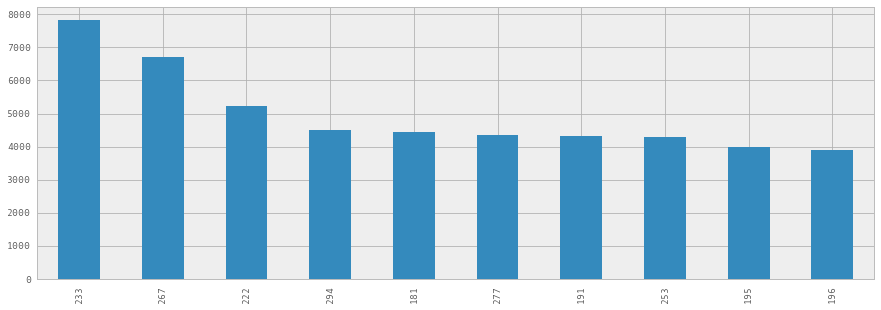

In [33]:
bike_stats['Start station'].value_counts()[:10].plot(kind='bar')

# Linking multiple tables

In [34]:
!cat data/bysykkel/stations.json

{"stations":[{"id":157,"in_service":true,"title":"Nylandsveien","subtitle":"mellom Norbygata og Urtegata","number_of_locks":30,"center":{"latitude":59.91562,"longitude":10.762248},"bounds":[{"latitude":59.915418602160436,"longitude":10.762068629264832},{"latitude":59.91565254992276,"longitude":10.762672126293182},{"latitude":59.915807169665264,"longitude":10.762433409690855},{"latitude":59.91557994562126,"longitude":10.761821866035461},{"latitude":59.915418602160436,"longitude":10.762068629264832}]},{"id":158,"in_service":true,"title":"Bentsebrugata","subtitle":"rett over busstoppet","number_of_locks":24,"center":{"latitude":59.939228,"longitude":10.75917},"bounds":[{"latitude":59.93914016847159,"longitude":10.758990666291977},{"latitude":59.93914016847159,"longitude":10.759349333708023},{"latitude":59.939319831528415,"longitude":10.759349333708023},{"latitude":59.939319831528415,"longitude":10.758990666291977},{"latitude":59.93914016847159,"longitude":10.758990666291977}]},{"id":159,"

The obvious thing would be to use `pd.read_json`, but this does not work because it expects the json to be in a certain format.

In [35]:
# bike_stations = pd.read_json('data/bysykkel/stations')

Instead we load the data with the `json` module:

In [36]:
import json
json_stations = json.load(open('data/bysykkel/stations.json', 'r'))
json_stations

{'stations': [{'bounds': [{'latitude': 59.915418602160436,
     'longitude': 10.762068629264832},
    {'latitude': 59.91565254992276, 'longitude': 10.762672126293182},
    {'latitude': 59.915807169665264, 'longitude': 10.762433409690855},
    {'latitude': 59.91557994562126, 'longitude': 10.761821866035461},
    {'latitude': 59.915418602160436, 'longitude': 10.762068629264832}],
   'center': {'latitude': 59.91562, 'longitude': 10.762248},
   'id': 157,
   'in_service': True,
   'number_of_locks': 30,
   'subtitle': 'mellom Norbygata og Urtegata',
   'title': 'Nylandsveien'},
  {'bounds': [{'latitude': 59.93914016847159, 'longitude': 10.758990666291977},
    {'latitude': 59.93914016847159, 'longitude': 10.759349333708023},
    {'latitude': 59.939319831528415, 'longitude': 10.759349333708023},
    {'latitude': 59.939319831528415, 'longitude': 10.758990666291977},
    {'latitude': 59.93914016847159, 'longitude': 10.758990666291977}],
   'center': {'latitude': 59.939228, 'longitude': 10.759

We are interested in the node `stations`, so let's extract this:

In [37]:
station_json = json_stations['stations']
station_json

[{'bounds': [{'latitude': 59.915418602160436, 'longitude': 10.762068629264832},
   {'latitude': 59.91565254992276, 'longitude': 10.762672126293182},
   {'latitude': 59.915807169665264, 'longitude': 10.762433409690855},
   {'latitude': 59.91557994562126, 'longitude': 10.761821866035461},
   {'latitude': 59.915418602160436, 'longitude': 10.762068629264832}],
  'center': {'latitude': 59.91562, 'longitude': 10.762248},
  'id': 157,
  'in_service': True,
  'number_of_locks': 30,
  'subtitle': 'mellom Norbygata og Urtegata',
  'title': 'Nylandsveien'},
 {'bounds': [{'latitude': 59.93914016847159, 'longitude': 10.758990666291977},
   {'latitude': 59.93914016847159, 'longitude': 10.759349333708023},
   {'latitude': 59.939319831528415, 'longitude': 10.759349333708023},
   {'latitude': 59.939319831528415, 'longitude': 10.758990666291977},
   {'latitude': 59.93914016847159, 'longitude': 10.758990666291977}],
  'center': {'latitude': 59.939228, 'longitude': 10.75917},
  'id': 158,
  'in_service': 

We can now use the `pandas.io.json_normalize` function to read in the entire dataset:

In [38]:
stations = pd.io.json.json_normalize(station_json)
stations

,bounds,center.latitude,center.longitude,id,in_service,number_of_locks,subtitle,title
0,"[{'latitude': 59.915418602160436, 'longitude':...",59.915620,10.762248,157,True,30,mellom Norbygata og Urtegata,Nylandsveien
1,"[{'latitude': 59.93914016847159, 'longitude': ...",59.939228,10.759170,158,True,24,rett over busstoppet,Bentsebrugata
2,"[{'latitude': 59.93915186056247, 'longitude': ...",59.939238,10.774279,159,True,21,Mellom Åsengata og Nordkappgata,Hans Nielsen Hauges plass
3,"[{'latitude': 59.9101839259445, 'longitude': 1...",59.910215,10.751687,160,True,25,nærmest fontenen,Sjøsiden vest
4,"[{'latitude': 59.926781168471585, 'longitude':...",59.926872,10.738456,161,True,20,ved busstoppet Colletts gate,St. Hanshaugen park vest
5,"[{'latitude': 59.934793030994975, 'longitude':...",59.934934,10.749475,162,True,30,i Uelands gate,Arkitekt Rivertz Plass
6,"[{'latitude': 59.91336409351895, 'longitude': ...",59.913409,10.757370,163,True,42,langs Brugata,Vaterlandsparken
7,"[{'latitude': 59.91937801304554, 'longitude': ...",59.919530,10.743836,164,True,18,langs Ullevålsveien,Vår Frelsers gravlund sør
8,"[{'latitude': 59.920604057407466, 'longitude':...",59.920565,10.734274,167,True,18,ved Stensberggata,Pilestredet Park Studenthus
9,"[{'latitude': 59.92461258365721, 'longitude': ...",59.924729,10.724579,169,True,18,ved Sporveisgata,Bogstadveien


## Setting the index

And before extracting data from the dataframe, it is good practice to assign a column with unique values as the index of the dataframe. For the stations DataFrame, the `id` column is a good choice:

In [39]:
stations = stations.set_index('id')
stations

,bounds,center.latitude,center.longitude,in_service,number_of_locks,subtitle,title
id,,,,,,,
157,"[{'latitude': 59.915418602160436, 'longitude':...",59.915620,10.762248,True,30,mellom Norbygata og Urtegata,Nylandsveien
158,"[{'latitude': 59.93914016847159, 'longitude': ...",59.939228,10.759170,True,24,rett over busstoppet,Bentsebrugata
159,"[{'latitude': 59.93915186056247, 'longitude': ...",59.939238,10.774279,True,21,Mellom Åsengata og Nordkappgata,Hans Nielsen Hauges plass
160,"[{'latitude': 59.9101839259445, 'longitude': 1...",59.910215,10.751687,True,25,nærmest fontenen,Sjøsiden vest
161,"[{'latitude': 59.926781168471585, 'longitude':...",59.926872,10.738456,True,20,ved busstoppet Colletts gate,St. Hanshaugen park vest
162,"[{'latitude': 59.934793030994975, 'longitude':...",59.934934,10.749475,True,30,i Uelands gate,Arkitekt Rivertz Plass
163,"[{'latitude': 59.91336409351895, 'longitude': ...",59.913409,10.757370,True,42,langs Brugata,Vaterlandsparken
164,"[{'latitude': 59.91937801304554, 'longitude': ...",59.919530,10.743836,True,18,langs Ullevålsveien,Vår Frelsers gravlund sør
167,"[{'latitude': 59.920604057407466, 'longitude':...",59.920565,10.734274,True,18,ved Stensberggata,Pilestredet Park Studenthus


The index will be used, e.g. for row labels when plotting:

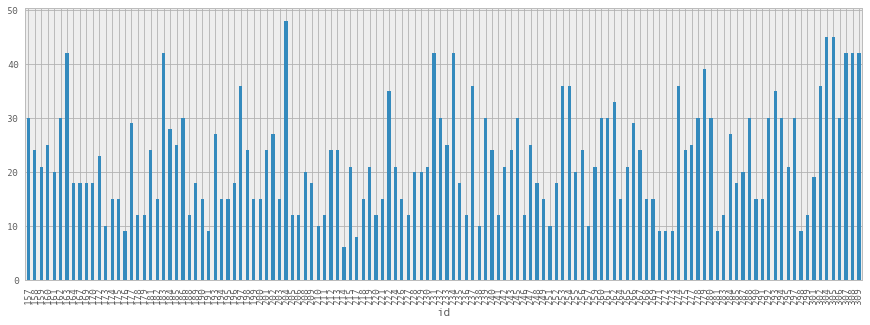

In [40]:
stations["number_of_locks"].plot("bar")

Some of the columns are not so usefull. We can extract a subset of the dataframe with:
```python
Dataframe.drop([Column Name or list], axis=1)
```
Lets reduce our stations to the usefull columns:

In [41]:
stations = stations.drop(["bounds", "subtitle"], axis=1)
stations.head()

,center.latitude,center.longitude,in_service,number_of_locks,title
id,,,,,
157,59.915620,10.762248,True,30,Nylandsveien
158,59.939228,10.759170,True,24,Bentsebrugata
159,59.939238,10.774279,True,21,Hans Nielsen Hauges plass
160,59.910215,10.751687,True,25,Sjøsiden vest
161,59.926872,10.738456,True,20,St. Hanshaugen park vest


We can extract parts of our `DataFrame` with 
```python
DataFrame.loc[startrow:endrow,startcolumn:endcolumn]
```
So for example if we are interested in the GPS positions for the stations with id 130-140 we use:

In [42]:
stations.loc[160:170, "center.latitude":"center.longitude"]

,center.latitude,center.longitude
id,,
160,59.910215,10.751687
161,59.926872,10.738456
162,59.934934,10.749475
163,59.913409,10.757370
164,59.919530,10.743836
167,59.920565,10.734274
169,59.924729,10.724579
170,59.930603,10.714784


We can mathematical functions such as `min`, `max` or `mean` to get some information about a column:

In [43]:
print("min number of locks:  {}".format(stations["number_of_locks"].min()))
print("max number of locks:  {}".format(stations["number_of_locks"].max()))
print("mean number of locks: {}".format(stations["number_of_locks"].mean()))

min number of locks:  6
max number of locks:  48
mean number of locks: 22.29230769230769


We can `where` statments to find rows that satisfy certain conditions: 

In [44]:
large_stations = stations[stations["number_of_locks"] > 30]

In [45]:
len(large_stations), len(stations)

(20, 130)

## Plotting maps

It would be nice to plot the stations in a Google Maps map. We use the module `gmplot` for this:

In [47]:
import gmplot

gmap = gmplot.GoogleMapPlotter(59.915620, 10.762248, zoom=12)
gmap.draw("mymap.html")

We can now open up the `mymap.html` with our favorite browser, or simply in the IPython notebook:

In [58]:
# Show the plot
from IPython.display import IFrame
IFrame('mymap.html', width=700, height=350)

Next, we extract the stations longtitude, latitude and location tile: 

In [59]:
stations[["center.latitude", "center.longitude"]].head()

,center.latitude,center.longitude
id,,
157,59.915620,10.762248
158,59.939228,10.759170
159,59.939238,10.774279
160,59.910215,10.751687
161,59.926872,10.738456


In [60]:
x = stations["center.latitude"][:10]

In [61]:
x.values

array([ 59.91562 ,  59.939228,  59.939238,  59.910215,  59.926872,
        59.934934,  59.913409,  59.91953 ,  59.920565,  59.924729])

And add it to our plot:

In [62]:
from insertapikey import insertapikey
gmap.scatter(stations["center.latitude"].values, stations["center.longitude"].values, size=10, marker=True)
gmap.draw("mymap_with_stations.html")
insertapikey("mymap_with_stations.html")
IFrame('mymap_with_stations.html', width=700, height=350)

# Concatenating and merging

## Concatenating Panda objects

The data so far only contained the statistics for October 2016:

In [63]:
bike_stats_types["Start time"].min(), bike_stats_types["Start time"].max()

(Timestamp('2016-10-01 04:00:08'), Timestamp('2016-10-31 22:59:10'))

Let us load the data for September 2016:

In [64]:
bike_stats_september = pd.read_csv('data/bysykkel/trips-2016.9.1-2016.9.30.csv', sep=',', parse_dates=['Start time', 'End time'])

To concatenate the two, we use the `concat` function:

In [65]:
bike_stats_sep_oct = pd.concat((bike_stats_september, bike_stats_types))

**Note**: An altnerative implementation is 
```
bike_stats_sep_oct = bike_stats_september.append(bike_stats_types)
```

Let's check again that we indeed have the full range:

In [66]:
bike_stats_sep_oct["Start time"].min(), bike_stats_sep_oct["Start time"].max()

(Timestamp('2016-09-01 04:00:02'), Timestamp('2016-10-31 22:59:10'))

## Merging Panda objects

So far our bike statistics stores the bike stations as abstract integeres:


In [67]:
bike_stats_sep_oct.head()

,Start station,Start time,End station,End time
0,291,2016-09-01 04:00:02,301.0,2016-09-01 04:06:06
1,262,2016-09-01 04:00:07,292.0,2016-09-01 04:15:43
2,277,2016-09-01 04:00:07,163.0,2016-09-01 04:03:07
3,174,2016-09-01 04:00:07,157.0,2016-09-01 04:11:33
4,257,2016-09-01 04:00:13,257.0,2016-09-01 05:36:16


Wouldn't it be nice to add more information about the station? We can do this by merging the information in the `stations` DataFrame into the `bike_stats_sep_oct` DataFrame. The syntax for merging two tables with the most important arguments is:

```python
pd.merge(left, right, how='inner', left_on=None, right_on=None)
```         
The arguments mean the following:
* `left`: A DataFrame object
* `right`: Another DataFrame object
* `left_on`: Columns from the left DataFrame to use as keys. Can either be column names or arrays with length equal to the length of the DataFrame
* `right_on`: Columns from the right DataFrame to use as keys. Can either be column names or arrays with length equal to the length of the DataFrame
* `how`: One of 'left', 'right', 'outer', 'inner'. Defaults to inner. See below for more detailed description of each method

Let's try it out. First, lets check the names of our columns again:

In [68]:
print(bike_stats_sep_oct.dtypes)

Start station             int64
Start time       datetime64[ns]
End station             float64
End time         datetime64[ns]
dtype: object


In [69]:
print(stations.dtypes)

center.latitude     float64
center.longitude    float64
in_service             bool
number_of_locks       int64
title                object
dtype: object


We want to merge in the columns `bike_stats_sep_oct["Start station"]` with the index for `stations`. We merge call is therefore:

In [70]:
merged_bike_stats = pd.merge(bike_stats_sep_oct, stations, how='left', left_on="Start station", right_index=True)
merged_bike_stats

,Start station,Start time,End station,End time,center.latitude,center.longitude,in_service,number_of_locks,title
0,291,2016-09-01 04:00:02,301.0,2016-09-01 04:06:06,59.929858,10.743541,True,15.0,St. Hanshaugen park nord
1,262,2016-09-01 04:00:07,292.0,2016-09-01 04:15:43,59.923159,10.766055,True,33.0,Sofienbergparken nord
2,277,2016-09-01 04:00:07,163.0,2016-09-01 04:03:07,59.912071,10.766201,True,25.0,Helga Helgesens plass
3,174,2016-09-01 04:00:07,157.0,2016-09-01 04:11:33,59.926205,10.709786,True,15.0,Frogner Tennisklubb
4,257,2016-09-01 04:00:13,257.0,2016-09-01 05:36:16,59.923033,10.771682,True,10.0,Trondheimsveien
5,306,2016-09-01 04:00:18,181.0,2016-09-01 04:11:13,59.915290,10.748453,True,30.0,Møllergata
6,266,2016-09-01 04:00:21,196.0,2016-09-01 04:08:18,59.915399,10.769469,True,29.0,Botanisk Hage sør
7,167,2016-09-01 04:00:26,301.0,2016-09-01 04:03:57,59.920565,10.734274,True,18.0,Pilestredet Park Studenthus
8,228,2016-09-01 04:00:45,301.0,2016-09-01 04:06:39,59.925276,10.750405,True,20.0,AHO
9,217,2016-09-01 04:00:47,261.0,2016-09-01 04:10:56,59.932779,10.734499,True,8.0,Adamstuen


Let's check that we still have all the data rows:

In [71]:
print(len(merged_bike_stats))
print(len(bike_stats_sep_oct))

620435
620435


Wohooo!

Let us do the same for `End station`. To avoid overlapping column names, we use the `suffices`:

In [72]:
merged_bike_stats2 = pd.merge(merged_bike_stats, stations, how='left', left_on="End station", right_index=True, suffixes=("_start", "_end"))
merged_bike_stats2

,Start station,Start time,End station,End time,center.latitude_start,center.longitude_start,in_service_start,number_of_locks_start,title_start,center.latitude_end,center.longitude_end,in_service_end,number_of_locks_end,title_end
0,291,2016-09-01 04:00:02,301,2016-09-01 04:06:06,59.929858,10.743541,True,15.0,St. Hanshaugen park nord,59.914742,10.741007,True,19.0,Professor Aschehougs plass
1,262,2016-09-01 04:00:07,292,2016-09-01 04:15:43,59.923159,10.766055,True,33.0,Sofienbergparken nord,59.909494,10.722502,True,30.0,Tjuvholmen
2,277,2016-09-01 04:00:07,163,2016-09-01 04:03:07,59.912071,10.766201,True,25.0,Helga Helgesens plass,59.913409,10.757370,True,42.0,Vaterlandsparken
3,174,2016-09-01 04:00:07,157,2016-09-01 04:11:33,59.926205,10.709786,True,15.0,Frogner Tennisklubb,59.915620,10.762248,True,30.0,Nylandsveien
4,257,2016-09-01 04:00:13,257,2016-09-01 05:36:16,59.923033,10.771682,True,10.0,Trondheimsveien,59.923033,10.771682,True,10.0,Trondheimsveien
5,306,2016-09-01 04:00:18,181,2016-09-01 04:11:13,59.915290,10.748453,True,30.0,Møllergata,59.913015,10.746714,True,24.0,Kirkeristen
6,266,2016-09-01 04:00:21,196,2016-09-01 04:08:18,59.915399,10.769469,True,29.0,Botanisk Hage sør,59.928410,10.759368,True,18.0,Ringnes Park
7,167,2016-09-01 04:00:26,301,2016-09-01 04:03:57,59.920565,10.734274,True,18.0,Pilestredet Park Studenthus,59.914742,10.741007,True,19.0,Professor Aschehougs plass
8,228,2016-09-01 04:00:45,301,2016-09-01 04:06:39,59.925276,10.750405,True,20.0,AHO,59.914742,10.741007,True,19.0,Professor Aschehougs plass
9,217,2016-09-01 04:00:47,261,2016-09-01 04:10:56,59.932779,10.734499,True,8.0,Adamstuen,59.914200,10.715627,True,30.0,Hydroparken


## What are the busiest stations?

Let's first find the busiest station:

In [73]:
busy_station = merged_bike_stats2['Start station'].value_counts()[:5]
busy_station

233    19685
267    17474
222    14296
253    12227
294    11972
Name: Start station, dtype: int64

In [74]:
stations.loc[busy_station.index]

,center.latitude,center.longitude,in_service,number_of_locks,title
233,59.928050,10.751203,True,25,Alexander Kiellands Plass
267,59.925480,10.731318,True,24,Bislett Stadion
222,59.922414,10.758127,True,35,Olaf Ryes plass
253,59.911151,10.729977,True,36,Aker Brygge
294,59.915936,10.751573,True,30,Torggata


Next lets filter out all statistics of this station

In [75]:
ak_plass_stats = merged_bike_stats[merged_bike_stats["Start station"] == busy_station.index[0]]
ak_plass_stats

,Start station,Start time,End station,End time,center.latitude,center.longitude,in_service,number_of_locks,title
39,233,2016-09-01 04:11:08,211.0,2016-09-01 04:17:26,59.92805,10.751203,True,25.0,Alexander Kiellands Plass
62,233,2016-09-01 04:17:29,247.0,2016-09-01 04:24:37,59.92805,10.751203,True,25.0,Alexander Kiellands Plass
65,233,2016-09-01 04:17:53,271.0,2016-09-01 04:22:21,59.92805,10.751203,True,25.0,Alexander Kiellands Plass
85,233,2016-09-01 04:22:16,272.0,2016-09-01 04:27:51,59.92805,10.751203,True,25.0,Alexander Kiellands Plass
92,233,2016-09-01 04:24:46,295.0,2016-09-01 04:32:12,59.92805,10.751203,True,25.0,Alexander Kiellands Plass
99,233,2016-09-01 04:25:37,211.0,2016-09-01 04:32:48,59.92805,10.751203,True,25.0,Alexander Kiellands Plass
136,233,2016-09-01 04:33:44,267.0,2016-09-01 04:40:32,59.92805,10.751203,True,25.0,Alexander Kiellands Plass
167,233,2016-09-01 04:38:27,222.0,2016-09-01 04:42:42,59.92805,10.751203,True,25.0,Alexander Kiellands Plass
250,233,2016-09-01 04:50:01,185.0,2016-09-01 04:55:39,59.92805,10.751203,True,25.0,Alexander Kiellands Plass
272,233,2016-09-01 04:52:39,186.0,2016-09-01 05:00:32,59.92805,10.751203,True,25.0,Alexander Kiellands Plass


Let's plot the results

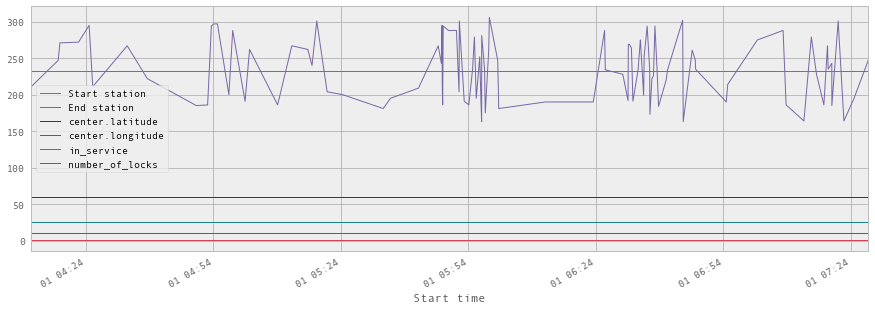

In [76]:
ak_plass_stats = ak_plass_stats.set_index("Start time")
ak_plass_stats[:100].plot(kind="line")

## When weekdays are the citybikes being used? 

Now we can ask questions like: who is using the Oslo city bikes? More commuter city or a biking-for-fun city 
Or do people bike more on weekends, or on weekdays?

### Adding a 'weekday' column to our dataframe

In [ ]:
bike_stats.head()